<a href="https://colab.research.google.com/github/Homaoa/From-scraping-to-data-analysis-Glassdoor-website/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
url='/content/glassdoor_data_cleaned.csv'
df=pd.read_csv(url)
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,Title,City,Salary,Rating,Company,Hourly,Salary without $ and K,Min_Salary,Max_Salary,Avg_Salary,State,Title Simp,Seniority
0,DATA SCIENTIST-HEALTHCARE,"Dayton, OH",$56K - $96K,3.6,Premier Health,0,56 - 96,56,96,76.0,OH,data scientist,na
1,Data Scientist,"Washington, DC",$78K - $150K,3.9,Deloitte,0,78 - 150,78,150,114.0,DC,data scientist,na
2,Data Scientist,"Lorton, VA",$120K,2.6,QinetiQ Inc.,0,120,120,120,120.0,VA,data scientist,na
3,Data Scientist with TS Clearance,"Arlington, VA",$86K - $154K,3.9,Deloitte,0,86 - 154,86,154,120.0,VA,data scientist,na
4,Data Scientist Principal,"Hagerstown, MD",$73K - $137K,4.0,JLG Equipment Services Inc,0,73 - 137,73,137,105.0,MD,data scientist,sr


In [16]:
df.columns

Index(['Title', 'City', 'Salary', 'Rating', 'Company', 'Hourly',
       'Salary without $ and K', 'Min_Salary', 'Max_Salary', 'Avg_Salary',
       'State', 'Title Simp', 'Seniority'],
      dtype='object')

In [19]:
df.describe()

,Rating,Hourly,Min_Salary,Max_Salary,Avg_Salary
count,465.000000,544.000000,544.000000,544.000000,544.000000
mean,3.842796,0.040441,77.450368,128.531250,102.990809
std,0.552070,0.197173,33.103795,53.591482,42.168182
min,1.700000,0.000000,28.000000,34.000000,34.000000
25%,3.500000,0.000000,60.000000,103.000000,82.375000
50%,3.800000,0.000000,72.000000,125.000000,99.000000
75%,4.200000,0.000000,89.000000,145.250000,118.125000
max,5.000000,1.000000,250.000000,450.000000,350.000000


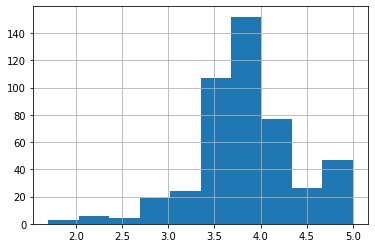

In [20]:
df['Rating'].hist()

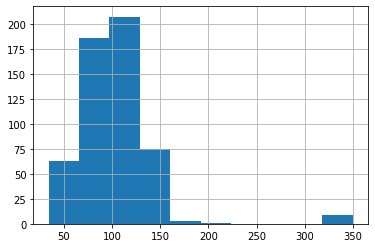

In [21]:
df['Avg_Salary'].hist()

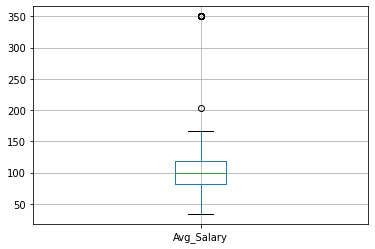

In [33]:
df.boxplot(column='Avg_Salary')

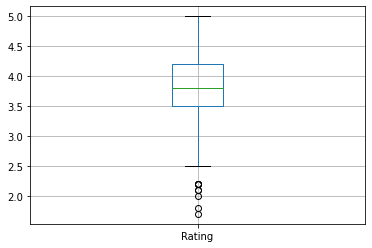

In [34]:
df.boxplot(column='Rating')

In [32]:
#there is outliers in avg_salary and rating

In [ ]:
#now that we looked at those two variables seperately, we want to check the  corelation between the continous variables

,Rating,Avg_Salary
Rating,1.000000,0.282104
Avg_Salary,0.282104,1.000000


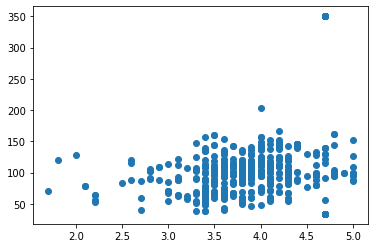

In [35]:
plt.scatter(df['Rating'],df['Avg_Salary'])
df[['Rating','Avg_Salary']].corr()

In [36]:
#now we check the categorical variables

In [52]:
df_cat=df[['Company','City', 'Hourly',
       'State', 'Title Simp', 'Seniority']]


 Graph for Company : total= 360


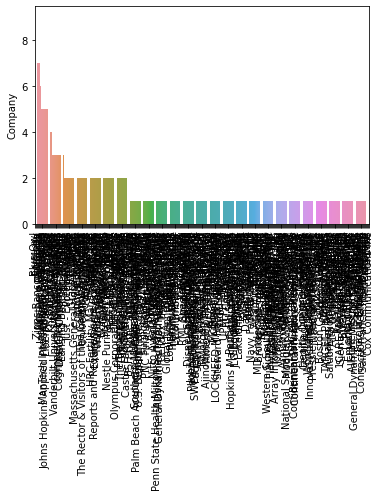


 Graph for City : total= 213


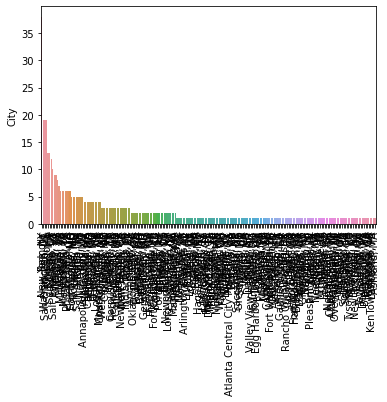


 Graph for Hourly : total= 2


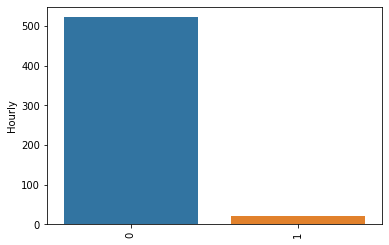


 Graph for State : total= 45


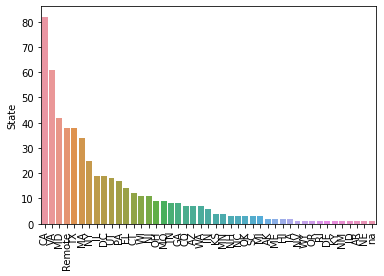


 Graph for Title Simp : total= 7


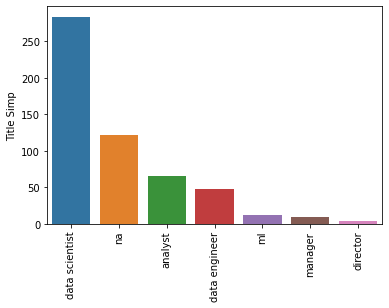


 Graph for Seniority : total= 3


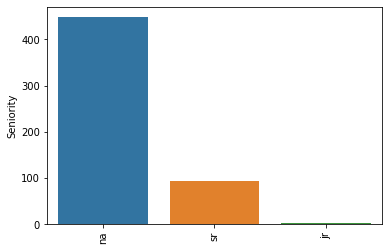

In [53]:
#we make a simple bar chart for each categorical variable
for i in df_cat.columns:
  num=df_cat[i].value_counts()
  print('\n Graph for '+str(i)+' : total= '+str(len(num)))
  chart=sns.barplot(x=num.index,y=num)
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
  plt.show()


 Graph for Company : total= 25


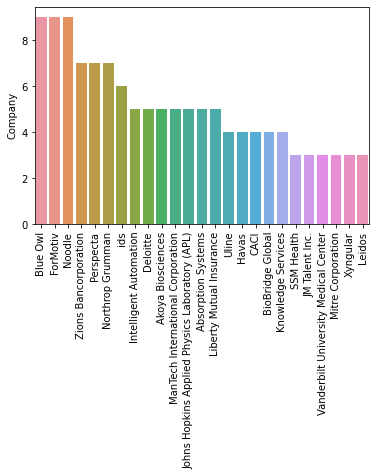


 Graph for City : total= 25


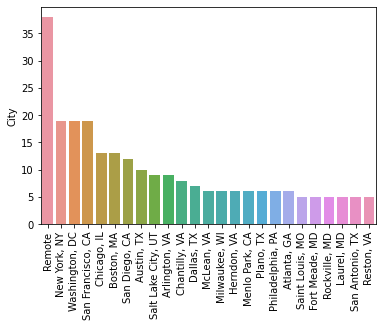


 Graph for State : total= 25


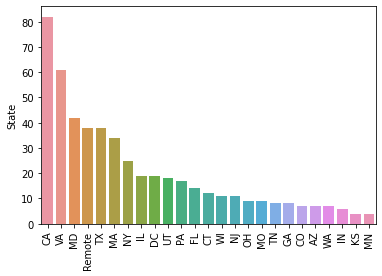

In [55]:
for i in df_cat[['Company','City','State']].columns:
  num=df_cat[i].value_counts()[:25]
  print('\n Graph for '+str(i)+' : total= '+str(len(num)))
  chart=sns.barplot(x=num.index,y=num)
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
  plt.show()

In [56]:
#now we draw pivot tables to look at salary by different categories

In [60]:
pd.pivot_table(df,index='Title Simp',values='Avg_Salary')

,Avg_Salary
Title Simp,
analyst,74.212121
data engineer,105.562500
data scientist,115.637324
director,126.250000
manager,103.944444
ml,112.833333
na,86.169421


In [ ]:
#we can see that directors are paid the most and then data scientists

In [61]:
pd.pivot_table(df,index=['Title Simp','Seniority'],values='Avg_Salary')

Avg_Salary
Title Simp     Seniority            
analyst        na          66.952830
               sr         103.807692
data engineer  jr          82.000000
               na         100.632353
               sr         120.269231
data scientist jr          95.000000
               na         114.620968
               sr         123.428571
director       na         105.000000
               sr         147.500000
manager        na         107.187500
               sr          78.000000
ml             na         112.833333
na             na          78.060440
               sr         110.766667

In [ ]:
#we see that seniors are paid more in all different titles

In [62]:
pd.pivot_table(df,index='State',values='Avg_Salary').sort_values('Avg_Salary',ascending=False)

,Avg_Salary
State,
CA,136.268293
RI,122.000000
WA,119.000000
NY,116.900000
NJ,116.227273
DC,112.421053
AZ,104.214286
MD,103.797619
Remote,103.473684


In [ ]:
#we see how salary differs from state to state. but it can because of different numbers of different titles

In [63]:
pd.pivot_table(df,index=['State','Title Simp'],values='Avg_Salary')

Avg_Salary
State Title Simp                
AK    analyst               59.5
      na                    54.5
AR    na                    89.5
AZ    analyst               62.0
      data engineer         88.5
...                          ...
WI    data engineer         87.0
      data scientist        89.5
      na                    69.5
WY    analyst               50.5
na    na                    53.0

[123 rows x 1 columns]

In [69]:
#we can check only data scientist positions for states, so we can better see the diffrence between states in salary (not affected by title)

In [70]:
pd.pivot_table(df[df['Title Simp']=='data scientist'],index='State',values='Avg_Salary')

,Avg_Salary
State,
AZ,129.166667
CA,170.353659
CO,108.416667
CT,86.000000
DC,115.933333
FL,82.875000
GA,107.250000
HI,111.500000
IL,101.437500


In [68]:
pd.pivot_table(df,index='Hourly',values='Avg_Salary')

,Avg_Salary
Hourly,
0,103.599617
1,88.545455


In [ ]:
#we see that hourly are paid less